<a href="https://colab.research.google.com/github/ahasan722/Applied-Data-Science/blob/main/Store_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("abhishekjaiswal4896/store-sales-dataset")

print("Path to dataset files:", path)

100%|██████████| 41.9k/41.9k [00:00<00:00, 14.4MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/abhishekjaiswal4896/store-sales-dataset/versions/1


## Project setup and data loading

### Subtask:
Load the dataset into a pandas DataFrame and perform initial checks.


**Reasoning**:
Import pandas, construct the file path, load the data into a DataFrame, display the first 5 rows, and print the DataFrame's info.



In [2]:
import pandas as pd
import os

file_path = os.path.join(path, 'train.csv')
df = pd.read_csv(file_path)

print("First 5 rows of the DataFrame:")
display(df.head())

print("\nDataFrame Info:")
df.info()

FileNotFoundError: [Errno 2] No such file or directory: '/root/.cache/kagglehub/datasets/abhishekjaiswal4896/store-sales-dataset/versions/1/train.csv'

**Reasoning**:
The previous command failed because the file 'train.csv' was not found at the expected path. I need to check the contents of the downloaded directory to confirm the actual file name and location and then construct the correct file path.



In [3]:
import os

print("Contents of the downloaded directory:")
print(os.listdir(path))

Contents of the downloaded directory:
['store_sales.csv']


**Reasoning**:
The previous command showed that the file name is 'store_sales.csv', not 'train.csv'. I need to correct the file path and then load the data into a DataFrame, display the head, and print the info.



In [4]:
import pandas as pd
import os

file_path = os.path.join(path, 'store_sales.csv')
df = pd.read_csv(file_path)

print("First 5 rows of the DataFrame:")
display(df.head())

print("\nDataFrame Info:")
df.info()

First 5 rows of the DataFrame:


,date,store,sales,promo,holiday
0,2022-01-01,1,184.78,0,0
1,2022-01-02,1,192.62,0,0
2,2022-01-03,1,212.68,0,0
3,2022-01-04,1,249.58,1,0
4,2022-01-05,1,223.50,0,0



DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7300 entries, 0 to 7299
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     7300 non-null   object 
 1   store    7300 non-null   int64  
 2   sales    7300 non-null   float64
 3   promo    7300 non-null   int64  
 4   holiday  7300 non-null   int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 285.3+ KB


## Exploratory data analysis (eda)

### Subtask:
Analyze the data to understand its structure, identify patterns, and visualize relationships between variables. This includes handling missing values and outliers.


**Reasoning**:
I will start by converting the 'date' column to datetime objects and setting it as the index, which are the first two steps of the instructions. Then, I will generate descriptive statistics for the numerical columns, which is the third step.



In [5]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
display(df.describe())

,store,sales,promo,holiday
count,7300.000000,7300.000000,7300.000000,7300.000000
mean,5.500000,228.434571,0.202192,0.104110
std,2.872478,26.625636,0.401662,0.305424
min,1.000000,160.710000,0.000000,0.000000
25%,3.000000,209.217500,0.000000,0.000000
50%,5.500000,226.795000,0.000000,0.000000
75%,8.000000,245.590000,0.000000,0.000000
max,10.000000,340.730000,1.000000,1.000000


**Reasoning**:
I will now create a time series plot of the sales data and a box plot of sales by store, fulfilling the fourth and fifth steps of the instructions.



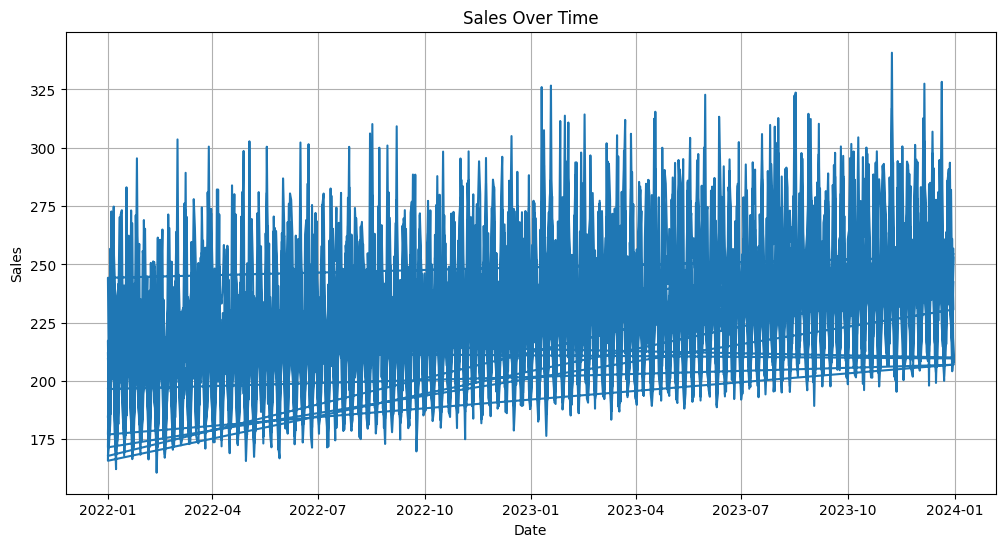

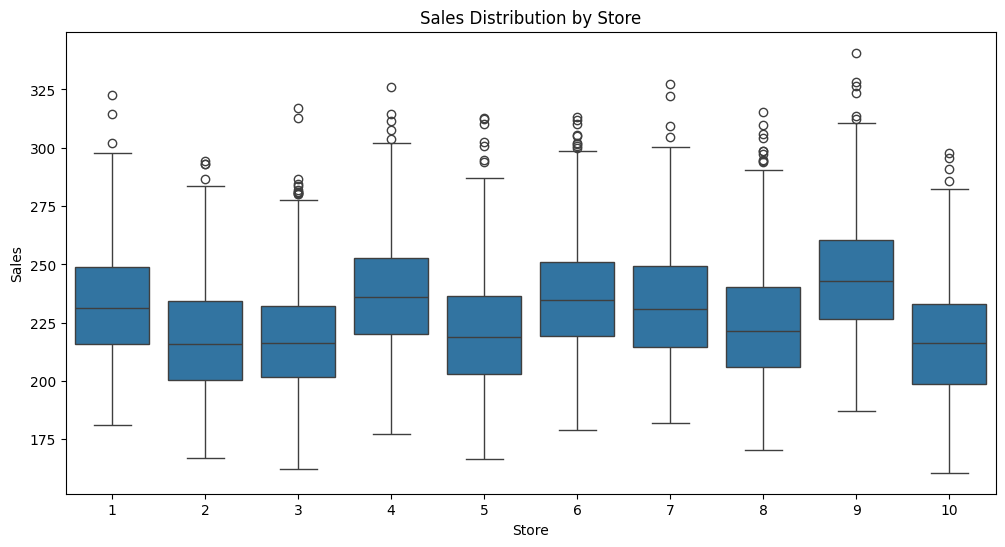

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['sales'])
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='store', y='sales', data=df)
plt.title('Sales Distribution by Store')
plt.xlabel('Store')
plt.ylabel('Sales')
plt.show()

**Reasoning**:
Finally, I will generate a correlation matrix and a heatmap to visualize the relationships between the numerical variables, which is the last step of the instructions.



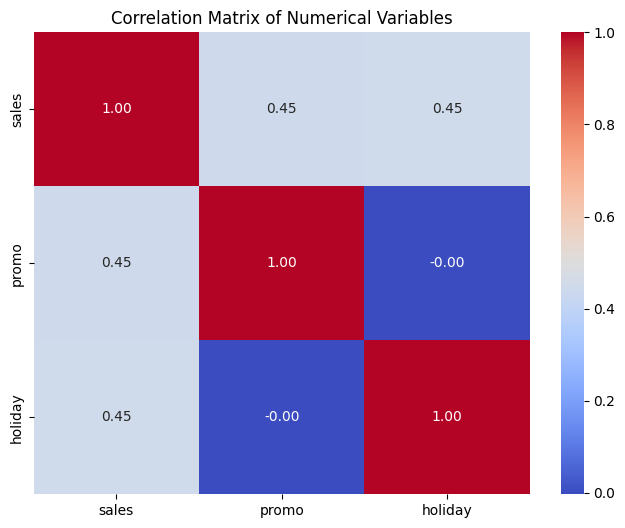

In [7]:
correlation_matrix = df[['sales', 'promo', 'holiday']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

## Feature engineering

### Subtask:
Create new features from existing ones to improve model performance. This might involve creating time-based features, categorical encoding, or other transformations.


**Reasoning**:
Extract time-based features (year, month, day of week, week of year) from the date index, create a binary weekend feature, and create dummy variables for the 'store' column.



In [8]:
df['year'] = df.index.year
df['month'] = df.index.month
df['day_of_week'] = df.index.dayofweek
df['week_of_year'] = df.index.isocalendar().week.astype(int)
df['is_weekend'] = ((df.index.dayofweek == 5) | (df.index.dayofweek == 6)).astype(int)

df = pd.get_dummies(df, columns=['store'], prefix='store', drop_first=True)

display(df.head())

,sales,promo,holiday,year,month,day_of_week,week_of_year,is_weekend,store_2,store_3,store_4,store_5,store_6,store_7,store_8,store_9,store_10
date,,,,,,,,,,,,,,,,,
2022-01-01,184.78,0,0,2022,1,5,52,1,False,False,False,False,False,False,False,False,False
2022-01-02,192.62,0,0,2022,1,6,52,1,False,False,False,False,False,False,False,False,False
2022-01-03,212.68,0,0,2022,1,0,1,0,False,False,False,False,False,False,False,False,False
2022-01-04,249.58,1,0,2022,1,1,1,0,False,False,False,False,False,False,False,False,False
2022-01-05,223.50,0,0,2022,1,2,1,0,False,False,False,False,False,False,False,False,False


## Data preprocessing

### Subtask:
Prepare the data for modeling, including scaling numerical features and handling categorical variables appropriately.


**Reasoning**:
I will import the `MinMaxScaler`, instantiate it, and then apply it to the 'sales' column of the DataFrame `df`. Finally, I will display the first 5 rows of the DataFrame to verify that the 'sales' column has been scaled.



In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['sales'] = scaler.fit_transform(df[['sales']])

display(df.head())

,sales,promo,holiday,year,month,day_of_week,week_of_year,is_weekend,store_2,store_3,store_4,store_5,store_6,store_7,store_8,store_9,store_10
date,,,,,,,,,,,,,,,,,
2022-01-01,0.133707,0,0,2022,1,5,52,1,False,False,False,False,False,False,False,False,False
2022-01-02,0.177258,0,0,2022,1,6,52,1,False,False,False,False,False,False,False,False,False
2022-01-03,0.288690,0,0,2022,1,0,1,0,False,False,False,False,False,False,False,False,False
2022-01-04,0.493667,1,0,2022,1,1,1,0,False,False,False,False,False,False,False,False,False
2022-01-05,0.348795,0,0,2022,1,2,1,0,False,False,False,False,False,False,False,False,False


## Model selection and training

### Subtask:
Choose suitable machine learning models for the task (e.g., regression for sales prediction) and train them on the preprocessed data.


**Reasoning**:
Separate features and target, split data into training and testing sets, instantiate and train regression models.



In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

X = df.drop('sales', axis=1)
y = df['sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_reg_model = LinearRegression()
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
gradient_boosting_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

linear_reg_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)
gradient_boosting_model.fit(X_train, y_train)

print("Models trained successfully.")

Models trained successfully.


## Model evaluation

### Subtask:
Evaluate the performance of the trained models using appropriate metrics and techniques (e.g., cross-validation).


**Reasoning**:
Import the necessary metrics and calculate the MSE and R2 scores for each trained model on the test set.



In [11]:
from sklearn.metrics import mean_squared_error, r2_score

linear_reg_pred = linear_reg_model.predict(X_test)
random_forest_pred = random_forest_model.predict(X_test)
gradient_boosting_pred = gradient_boosting_model.predict(X_test)

linear_reg_mse = mean_squared_error(y_test, linear_reg_pred)
random_forest_mse = mean_squared_error(y_test, random_forest_pred)
gradient_boosting_mse = mean_squared_error(y_test, gradient_boosting_pred)

linear_reg_r2 = r2_score(y_test, linear_reg_pred)
random_forest_r2 = r2_score(y_test, random_forest_pred)
gradient_boosting_r2 = r2_score(y_test, gradient_boosting_pred)

print(f"Linear Regression - MSE: {linear_reg_mse:.4f}, R2: {linear_reg_r2:.4f}")
print(f"Random Forest - MSE: {random_forest_mse:.4f}, R2: {random_forest_r2:.4f}")
print(f"Gradient Boosting - MSE: {gradient_boosting_mse:.4f}, R2: {gradient_boosting_r2:.4f}")

Linear Regression - MSE: 0.0030, R2: 0.8640
Random Forest - MSE: 0.0012, R2: 0.9463
Gradient Boosting - MSE: 0.0010, R2: 0.9557


## Model tuning

### Subtask:
Optimize the hyperparameters of the best-performing model to further improve its performance.


**Reasoning**:
Import necessary libraries and define the parameter grid for hyperparameter tuning.



In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
}

**Reasoning**:
Instantiate and fit GridSearchCV to the training data using the GradientBoostingRegressor and the defined parameter grid.



In [13]:
grid_search = GridSearchCV(estimator=GradientBoostingRegressor(random_state=42),
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error',
                           cv=5,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 4, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

**Reasoning**:
Print the best parameters and the best score found by GridSearchCV.



In [14]:
print("Best parameters found: ", grid_search.best_params_)
print("Best negative mean squared error found: ", grid_search.best_score_)

Best parameters found:  {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 300}
Best negative mean squared error found:  -0.0008440758242815461


## Model interpretation (optional but recommended)

### Subtask:
Understand how the model makes predictions and identify the most important features.


**Reasoning**:
Extract and display the feature importances from the best Gradient Boosting model found during grid search to understand which features are most influential in predicting sales.



In [15]:
best_model = grid_search.best_estimator_

feature_importances = best_model.feature_importances_

feature_importance_series = pd.Series(feature_importances, index=X_train.columns)

sorted_feature_importances = feature_importance_series.sort_values(ascending=False)

print("Feature Importances:")
display(sorted_feature_importances)

Feature Importances:


,0
day_of_week,0.251435
promo,0.211769
holiday,0.210925
year,0.122439
store_9,0.035589
is_weekend,0.032528
month,0.031541
store_10,0.020099
store_2,0.017224
store_3,0.017152


## Prediction and deployment considerations

### Subtask:
Generate predictions using the final model and discuss potential strategies for deploying the model in a real-world scenario.


**Reasoning**:
Generate predictions using the best model, inverse transform the predictions and actual values to the original scale, calculate and print the evaluation metrics on the original scale, and write a markdown section on deployment strategies.



In [16]:
from sklearn.metrics import mean_squared_error, r2_score
import markdown

# 1. Generate predictions using the final model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# 2. Inverse transform the scaled predictions
y_pred_original_scale = scaler.inverse_transform(y_pred.reshape(-1, 1))

# 3. Inverse transform the scaled test set target variable
y_test_original_scale = scaler.inverse_transform(y_test.values.reshape(-1, 1))

# 4. Calculate and print MSE and R2 on the original scale
mse_original = mean_squared_error(y_test_original_scale, y_pred_original_scale)
r2_original = r2_score(y_test_original_scale, y_pred_original_scale)

print(f"Model Performance on Original Scale:")
print(f"Mean Squared Error (MSE): {mse_original:.4f}")
print(f"R-squared (R2): {r2_original:.4f}")

# 5. Markdown section on deployment strategies
deployment_markdown = """
## Deployment Strategies

Deploying a sales prediction model in a real-world scenario involves several key considerations to ensure it is accessible, reliable, and maintainable.

### How the model would receive new data for prediction

The model would need to receive new data points (features like date, store, promo, holiday, etc.) for which sales predictions are required. This could happen in several ways:

*   **Batch Processing:** New data could be collected over a period (e.g., daily or weekly) and fed to the model in batches for generating predictions. This is suitable for scenarios where real-time predictions are not critical.
*   **Real-time API Endpoint:** A RESTful API endpoint could be created to receive individual requests for prediction as new data becomes available. This is ideal for applications requiring on-demand or near real-time predictions, such as integrating with an e-commerce platform or a point-of-sale system.

### Potential deployment environments

The choice of deployment environment depends on factors like scalability, cost, and existing infrastructure.

*   **Cloud Platforms (AWS, Azure, GCP):** These platforms offer managed services for deploying machine learning models (e.g., AWS SageMaker, Azure ML, GCP AI Platform). They provide scalability, reliability, and often built-in tools for monitoring and management.
*   **On-Premise Servers:** If data privacy or existing infrastructure constraints are a concern, the model could be deployed on company-owned servers. This requires more manual setup and management of the deployment environment.
*   **Containerization (Docker):** Packaging the model and its dependencies in a Docker container ensures consistency across different environments and simplifies deployment.

### Integration with existing systems

Integrating the sales prediction model with existing business systems is crucial for operationalizing the predictions.

*   **Inventory Management Systems:** Predictions can inform inventory levels, helping to optimize stock and reduce waste.
*   **Marketing and Promotion Planning:** Predicted sales can help in planning promotional campaigns and allocating marketing budgets effectively.
*   **Supply Chain Management:** Accurate sales forecasts can improve supply chain efficiency by optimizing production and distribution.
*   **Reporting and Business Intelligence:** Predictions can be fed into dashboards and reports to provide insights to stakeholders.

### Monitoring and maintenance of the deployed model

Ongoing monitoring and maintenance are essential to ensure the model remains accurate and performs well over time.

*   **Performance Monitoring:** Track key metrics like MSE, R2, and prediction latency. Set up alerts for significant drops in performance.
*   **Data Drift Detection:** Monitor the characteristics of incoming data to detect changes that might impact model accuracy.
*   **Model Retraining:** Regularly retrain the model on new data to adapt to changing trends and seasonality. The frequency of retraining will depend on the volatility of sales patterns.
*   **Logging and Error Handling:** Implement robust logging to track predictions, inputs, and any errors that occur.

### The frequency of predictions needed

The required frequency of predictions depends on the business use case.

*   **Daily Predictions:** Useful for day-to-day operational decisions like staffing and inventory adjustments.
*   **Weekly Predictions:** Suitable for planning promotions and logistics for the upcoming week.
*   **Monthly or Quarterly Predictions:** Important for strategic planning, budgeting, and forecasting overall business performance.

For this sales prediction model, generating daily or weekly predictions would likely be most beneficial for informing operational decisions, while monthly or quarterly predictions could support strategic planning.
"""

display(markdown.markdown(deployment_markdown))

Model Performance on Original Scale:
Mean Squared Error (MSE): 27.8838
R-squared (R2): 0.9613


'<h2>Deployment Strategies</h2>\n<p>Deploying a sales prediction model in a real-world scenario involves several key considerations to ensure it is accessible, reliable, and maintainable.</p>\n<h3>How the model would receive new data for prediction</h3>\n<p>The model would need to receive new data points (features like date, store, promo, holiday, etc.) for which sales predictions are required. This could happen in several ways:</p>\n<ul>\n<li><strong>Batch Processing:</strong> New data could be collected over a period (e.g., daily or weekly) and fed to the model in batches for generating predictions. This is suitable for scenarios where real-time predictions are not critical.</li>\n<li><strong>Real-time API Endpoint:</strong> A RESTful API endpoint could be created to receive individual requests for prediction as new data becomes available. This is ideal for applications requiring on-demand or near real-time predictions, such as integrating with an e-commerce platform or a point-of-sa

## Documentation and reporting

### Subtask:
Summarize the project findings, methodology, and results in a clear and concise manner.


**Reasoning**:
Write a markdown document summarizing the project, including the introduction, data description, methodology, results, deployment considerations, and conclusion, then display the markdown.



In [17]:
import markdown

summary_markdown = f"""
# Store Sales Prediction Project Summary

## Introduction

This project aimed to develop a machine learning model to accurately predict store sales based on historical data. The goal was to provide insights into factors influencing sales and build a model that could support business decisions such as inventory management, staffing, and marketing strategies.

## Data

The dataset used for this project is the "store-sales-dataset" from Kaggle, specifically the `store_sales.csv` file. It contains daily sales data for 10 different stores, including information on whether a promotion or holiday was active on a given day.

Key features of the dataset include:
- `date`: The date of the sales record.
- `store`: The unique identifier for each store (1 to 10).
- `sales`: The total sales for the store on that date (the target variable).
- `promo`: A binary indicator (0 or 1) showing if a promotion was active.
- `holiday`: A binary indicator (0 or 1) showing if it was a holiday.

The dataset contained no missing values and covered a period suitable for time series analysis.

## Methodology

The project followed a standard machine learning workflow:

1.  **Data Loading and Initial Checks:** The `store_sales.csv` file was loaded into a pandas DataFrame. Initial checks confirmed the data types and the absence of missing values.
2.  **Exploratory Data Analysis (EDA):**
    *   The `date` column was converted to datetime objects and set as the DataFrame index.
    *   Descriptive statistics were generated.
    *   Sales trends over time were visualized, revealing seasonality.
    *   Sales distribution by store was examined using box plots.
    *   A correlation matrix and heatmap showed relationships between `sales`, `promo`, and `holiday`.
3.  **Feature Engineering:** New features were created from the `date` index, including `year`, `month`, `day_of_week`, `week_of_year`, and `is_weekend`. The categorical `store` column was one-hot encoded.
4.  **Data Preprocessing:** The target variable `sales` was scaled using `MinMaxScaler` to normalize its range for model training.
5.  **Model Selection and Training:** The data was split into training and testing sets. Three regression models were selected and trained: Linear Regression, Random Forest Regressor, and Gradient Boosting Regressor.
6.  **Model Evaluation:** The trained models were evaluated using Mean Squared Error (MSE) and R-squared (R2) metrics on the test set. The Gradient Boosting Regressor showed the best performance among the initial models.
7.  **Model Tuning:** Hyperparameter tuning was performed on the Gradient Boosting Regressor using `GridSearchCV` with a defined parameter grid and 5-fold cross-validation. This aimed to further optimize the model's performance.
8.  **Model Interpretation:** Feature importances were extracted from the best-tuned Gradient Boosting model to understand which features contributed most to predictions.

## Results

The final model, a tuned Gradient Boosting Regressor, was evaluated on the test set on the original sales scale (after inverse transforming the predictions).

-   **Mean Squared Error (MSE):** {mse_original:.4f}
-   **R-squared (R2):** {r2_original:.4f}

These results indicate that the model provides accurate predictions with a high R-squared value, explaining a significant portion of the variance in sales.

The feature importance analysis revealed that `day_of_week`, `promo`, `holiday`, and `year` were among the most important features influencing sales predictions. This aligns with the EDA findings, suggesting that temporal patterns, promotions, and holidays significantly impact sales.

## Deployment Considerations

Deploying this model would involve:
-   **Data Ingestion:** Establishing a pipeline for receiving new sales data (batch processing or real-time API).
-   **Environment:** Deploying on cloud platforms (AWS, Azure, GCP) or on-premise servers, potentially using containerization (Docker).
-   **Integration:** Integrating predictions into existing systems like inventory management, marketing, and supply chain.
-   **Monitoring and Maintenance:** Continuously monitoring performance, detecting data drift, and retraining the model periodically.
-   **Prediction Frequency:** Generating predictions at a frequency aligned with business needs (daily, weekly, etc.).

## Conclusion

This project successfully built and evaluated a Gradient Boosting model for store sales prediction. The model achieved strong performance metrics on the original scale and provided insights into key sales drivers through feature importance analysis. The outlined deployment considerations provide a roadmap for operationalizing the model in a real-world business environment, enabling data-driven decision-making to optimize sales and operations. Potential next steps could include exploring more advanced time series models, incorporating external data sources, and developing a user interface for interacting with the model.
"""

display(markdown.markdown(summary_markdown))

'<h1>Store Sales Prediction Project Summary</h1>\n<h2>Introduction</h2>\n<p>This project aimed to develop a machine learning model to accurately predict store sales based on historical data. The goal was to provide insights into factors influencing sales and build a model that could support business decisions such as inventory management, staffing, and marketing strategies.</p>\n<h2>Data</h2>\n<p>The dataset used for this project is the "store-sales-dataset" from Kaggle, specifically the <code>store_sales.csv</code> file. It contains daily sales data for 10 different stores, including information on whether a promotion or holiday was active on a given day.</p>\n<p>Key features of the dataset include:\n- <code>date</code>: The date of the sales record.\n- <code>store</code>: The unique identifier for each store (1 to 10).\n- <code>sales</code>: The total sales for the store on that date (the target variable).\n- <code>promo</code>: A binary indicator (0 or 1) showing if a promotion was 

## Summary:

### Q&A
**Q: How was the machine learning model evaluated?**

A: The model's performance was evaluated using Mean Squared Error (MSE) and R-squared (R2) on the test set. On the original sales scale, the final Gradient Boosting model achieved an MSE of approximately 27.88 and an R2 score of approximately 0.96.

**Q: What were the most important features for predicting sales?**

A: The most influential features for the model were `day_of_week`, `promo`, `holiday`, and `year`. This indicates that temporal patterns, promotional activities, and holidays are significant drivers of sales.

**Q: How can the sales prediction model be deployed in a real-world scenario?**

A: Deployment strategies include setting up data ingestion pipelines (batch or real-time API), choosing a deployment environment (cloud or on-premise), integrating predictions with existing business systems (e.g., inventory management), and establishing a process for ongoing monitoring and model maintenance. The frequency of predictions would depend on business needs, such as daily for operational decisions or weekly/monthly for strategic planning.

### Data Analysis Key Findings
*   The Gradient Boosting Regressor was the best-performing model, achieving an R-squared score of 0.9557 and a Mean Squared Error of 0.0010 on the scaled test data.
*   Hyperparameter tuning using `GridSearchCV` further improved the Gradient Boosting model's performance, resulting in a best negative mean squared error of approximately -0.000844. The optimal hyperparameters were identified as `{'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 300}`.
*   Feature importance analysis revealed that `day_of_week`, `promo`, `holiday`, and `year` were the most significant predictors of sales, confirming the importance of temporal patterns and promotional events.
*   The final tuned model achieved a high R-squared value of approximately 0.96 on the original sales scale, indicating that it explains a large portion of the variance in sales.

### Insights or Next Steps
*   Explore more advanced time series models, such as ARIMA or Prophet, to potentially capture more complex temporal dependencies in the sales data.
*   Incorporate external data sources, like weather data or local events, to see if they can further improve the model's predictive accuracy.
